# Week 5 Homework
    - arrays: reshaping and stacking
    - standardization
    - grouping and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.array(np.random.uniform(0, 10, size =(5, 8))) # 'low =' and 'high =' not necessary
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print(f'Row 3:    {Z[2, :]}')
print(f'Column 6: {Z[:, 5]}')

Row 3:    [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
print(f'Row Sums:    {np.sum(Z, axis = 1)}')
print(f'Column Sums: {np.sum(Z, axis = 0)}')
print(f'Array Sum:   {np.sum(Z)}')

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)

# most of these commmands could be combined onto one line per array - I'm following stepwise instructions
x1 = np.array(np.random.normal(50, 10, 1000)) #reshape(1000, 1)   reshaping could have been done here
x2 = np.array(np.random.normal(20, 5, 1000))
x3 = np.array(np.random.normal(100, 30, 1000))
x4 = np.array(np.random.normal(10, 2, 1000))

# reshaping could have been done in one step above
x1 = x1.reshape(1000, 1)
x2 = x2.reshape(1000, 1)
x3 = x3.reshape(1000, 1)
x4 = x4.reshape(1000, 1)
X = np.hstack([x1, x2, x3, x4])

X = np.round(X, 2)
print(X.shape)  # also: print(np.shape(X))

(1000, 4)


In [6]:
print(X[:6, :])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
column_means = np.mean(X, axis = 0)
column_std = np.std(X, axis = 0)
print(f'Column means:               {np.round(column_means, 2)}')
print(f'Column standard deviations: {np.round(column_std, 2)}')

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [8]:
W = (X - column_means) / column_std
W_means = np.mean(W, axis = 0)
W_std = np.std(W, axis = 0)

print(f'Column means:               {np.round(W_means, 2)}')
print(f'Column standard deviations: {np.round(W_std, 2)}')

Column means:               [ 0. -0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.DataFrame(pd.read_csv('auto_mpg.txt', sep = '\t'))
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
print(auto.select_dtypes(include = 'number').mean())

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = pd.DataFrame(auto[auto.region == 'asia'])
eur_auto = pd.DataFrame(auto[auto.region == 'eur'])
usa_auto = pd.DataFrame(auto[auto.region == 'usa'])

print(f'Number of cars manufactured in Asia:   {len(asia_auto)}')
print(f'Number of cars manufactured in Europe: {len(eur_auto)}')
print(f'Number of cars manufactured in USA:    {len(usa_auto)}')

Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249


In [14]:
# Select only numeric columns for each DataFrame
asia_means = asia_auto.select_dtypes(include='number').mean(axis=0).values
eur_means = eur_auto.select_dtypes(include='number').mean(axis=0).values
usa_means = usa_auto.select_dtypes(include='number').mean(axis=0).values

# Create the DataFrame for the means
mean_df = pd.DataFrame([asia_means, eur_means, usa_means])  # Create DataFrame from means
mean_df.index = ['asia', 'eur', 'usa']  # Set index to regions
mean_df.columns = auto.select_dtypes(include='number').columns  # Set column names to numeric columns
mean_df


,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


In [15]:
#asia_means = np.array(np.mean(asia_auto))
#eur_means = np.array(np.mean(eur_auto))
#usa_means = np.array(np.mean(usa_auto))

#mean_df = pd.DataFrame([asia_means, eur_means, eur_means])
#mean_df.set_index(regions, inplace = True)  # set indices
#mean_df.columns = auto.columns[0:3]         # set column names
#mean_df

## Problem 6: Average Weight and MPG by Region

C:\Users\mmsax\AppData\Local\Temp\ipykernel_53152\1863736507.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.bar(mean_df.index[0], mean_df.mpg[0], color = colors1[0], edgecolor = 'black')
C:\Users\mmsax\AppData\Local\Temp\ipykernel_53152\1863736507.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.bar(mean_df.index[1], mean_df.mpg[1], color = colors1[1], edgecolor = 'black')
C:\Users\mmsax\AppData\Local\Temp\ipykernel_53152\1863736507.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

<Figure size 800x400 with 0 Axes>

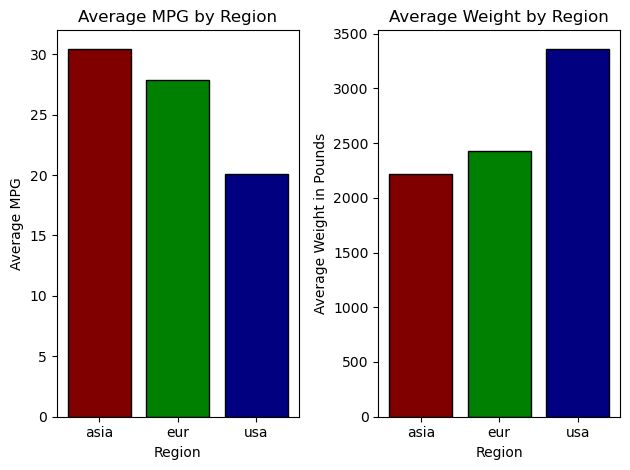

In [16]:
# assign colors and create figure
colors1 = ['maroon', 'green', 'navy']
fig = plt.figure(figsize = (8,4)) 
fig, (ax1, ax2) = plt.subplots(1, 2) 

# create subplot 1
ax1.bar(mean_df.index[0], mean_df.mpg[0], color = colors1[0], edgecolor = 'black')
ax1.bar(mean_df.index[1], mean_df.mpg[1], color = colors1[1], edgecolor = 'black')
ax1.bar(mean_df.index[2], mean_df.mpg[2], color = colors1[2], edgecolor = 'black')
ax1.set_title('Average MPG by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Average MPG')

# create subplot 2
ax2.bar(mean_df.index[0], mean_df.wt[0], color = colors1[0], edgecolor = 'black')
ax2.bar(mean_df.index[1], mean_df.wt[1], color = colors1[1], edgecolor = 'black')
ax2.bar(mean_df.index[2], mean_df.wt[2], color = colors1[2], edgecolor = 'black')
ax2.set_title('Average Weight by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Weight in Pounds')

plt.tight_layout() 
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

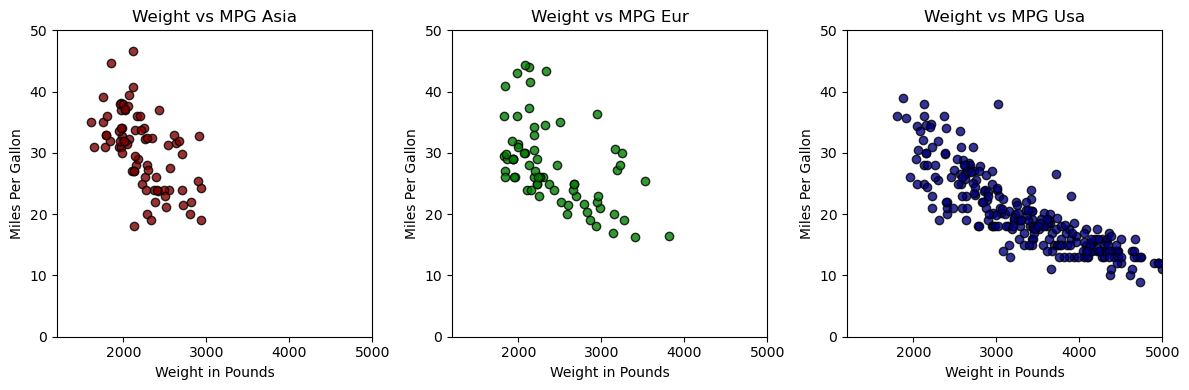

In [17]:
# assign colors, create figure of subplots
fig, axs = plt.subplots (1, 3, figsize = (12, 4))

# loop to create subplots: i = region index, j = region name
for i, j in enumerate (regions):
    loop_reg = auto[auto['region'] == j]
    axs[i].scatter (loop_reg['wt'], loop_reg['mpg'], color = colors1[i], edgecolor = 'black', alpha = 0.8)
    axs[i].set_xlim (1200, 5000)
    axs[i].set_ylim (0, 50)
    axs[i].set_xlabel ("Weight in Pounds")
    axs[i].set_ylabel ("Miles Per Gallon")
    axs[i].set_title ("Weight vs MPG " + "{}".format(j.capitalize()))
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [18]:
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


In [19]:
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


C:\Users\mmsax\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


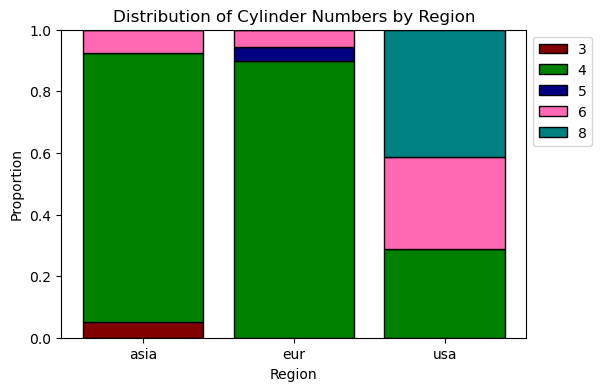

In [20]:
# use np to scale cyl values sums to 1
cyl_props_by_region = cyl_counts_by_region / np.sum(cyl_counts_by_region)

# set artificial counter for stacked outputs to 0 (baseline of this DF)
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region                     

# assign colors and define figure
colors2 = ['maroon', 'green', 'navy', 'hotpink', 'teal']
figure = plt.figure(figsize = (6, 4))

# loop over values of 'cyl'
for i in range(len(cyl_props_by_region.index)):
    plt.bar(cyl_props_by_region.columns, cyl_props_by_region.values[i], bottom = bar_bottoms.values[i], edgecolor = 'black', color = colors2[i])
      
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(cyl_values, bbox_to_anchor = (1,1))
plt.show()